In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
import seaborn as sns

In [90]:
df = pd.read_csv('data/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [91]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


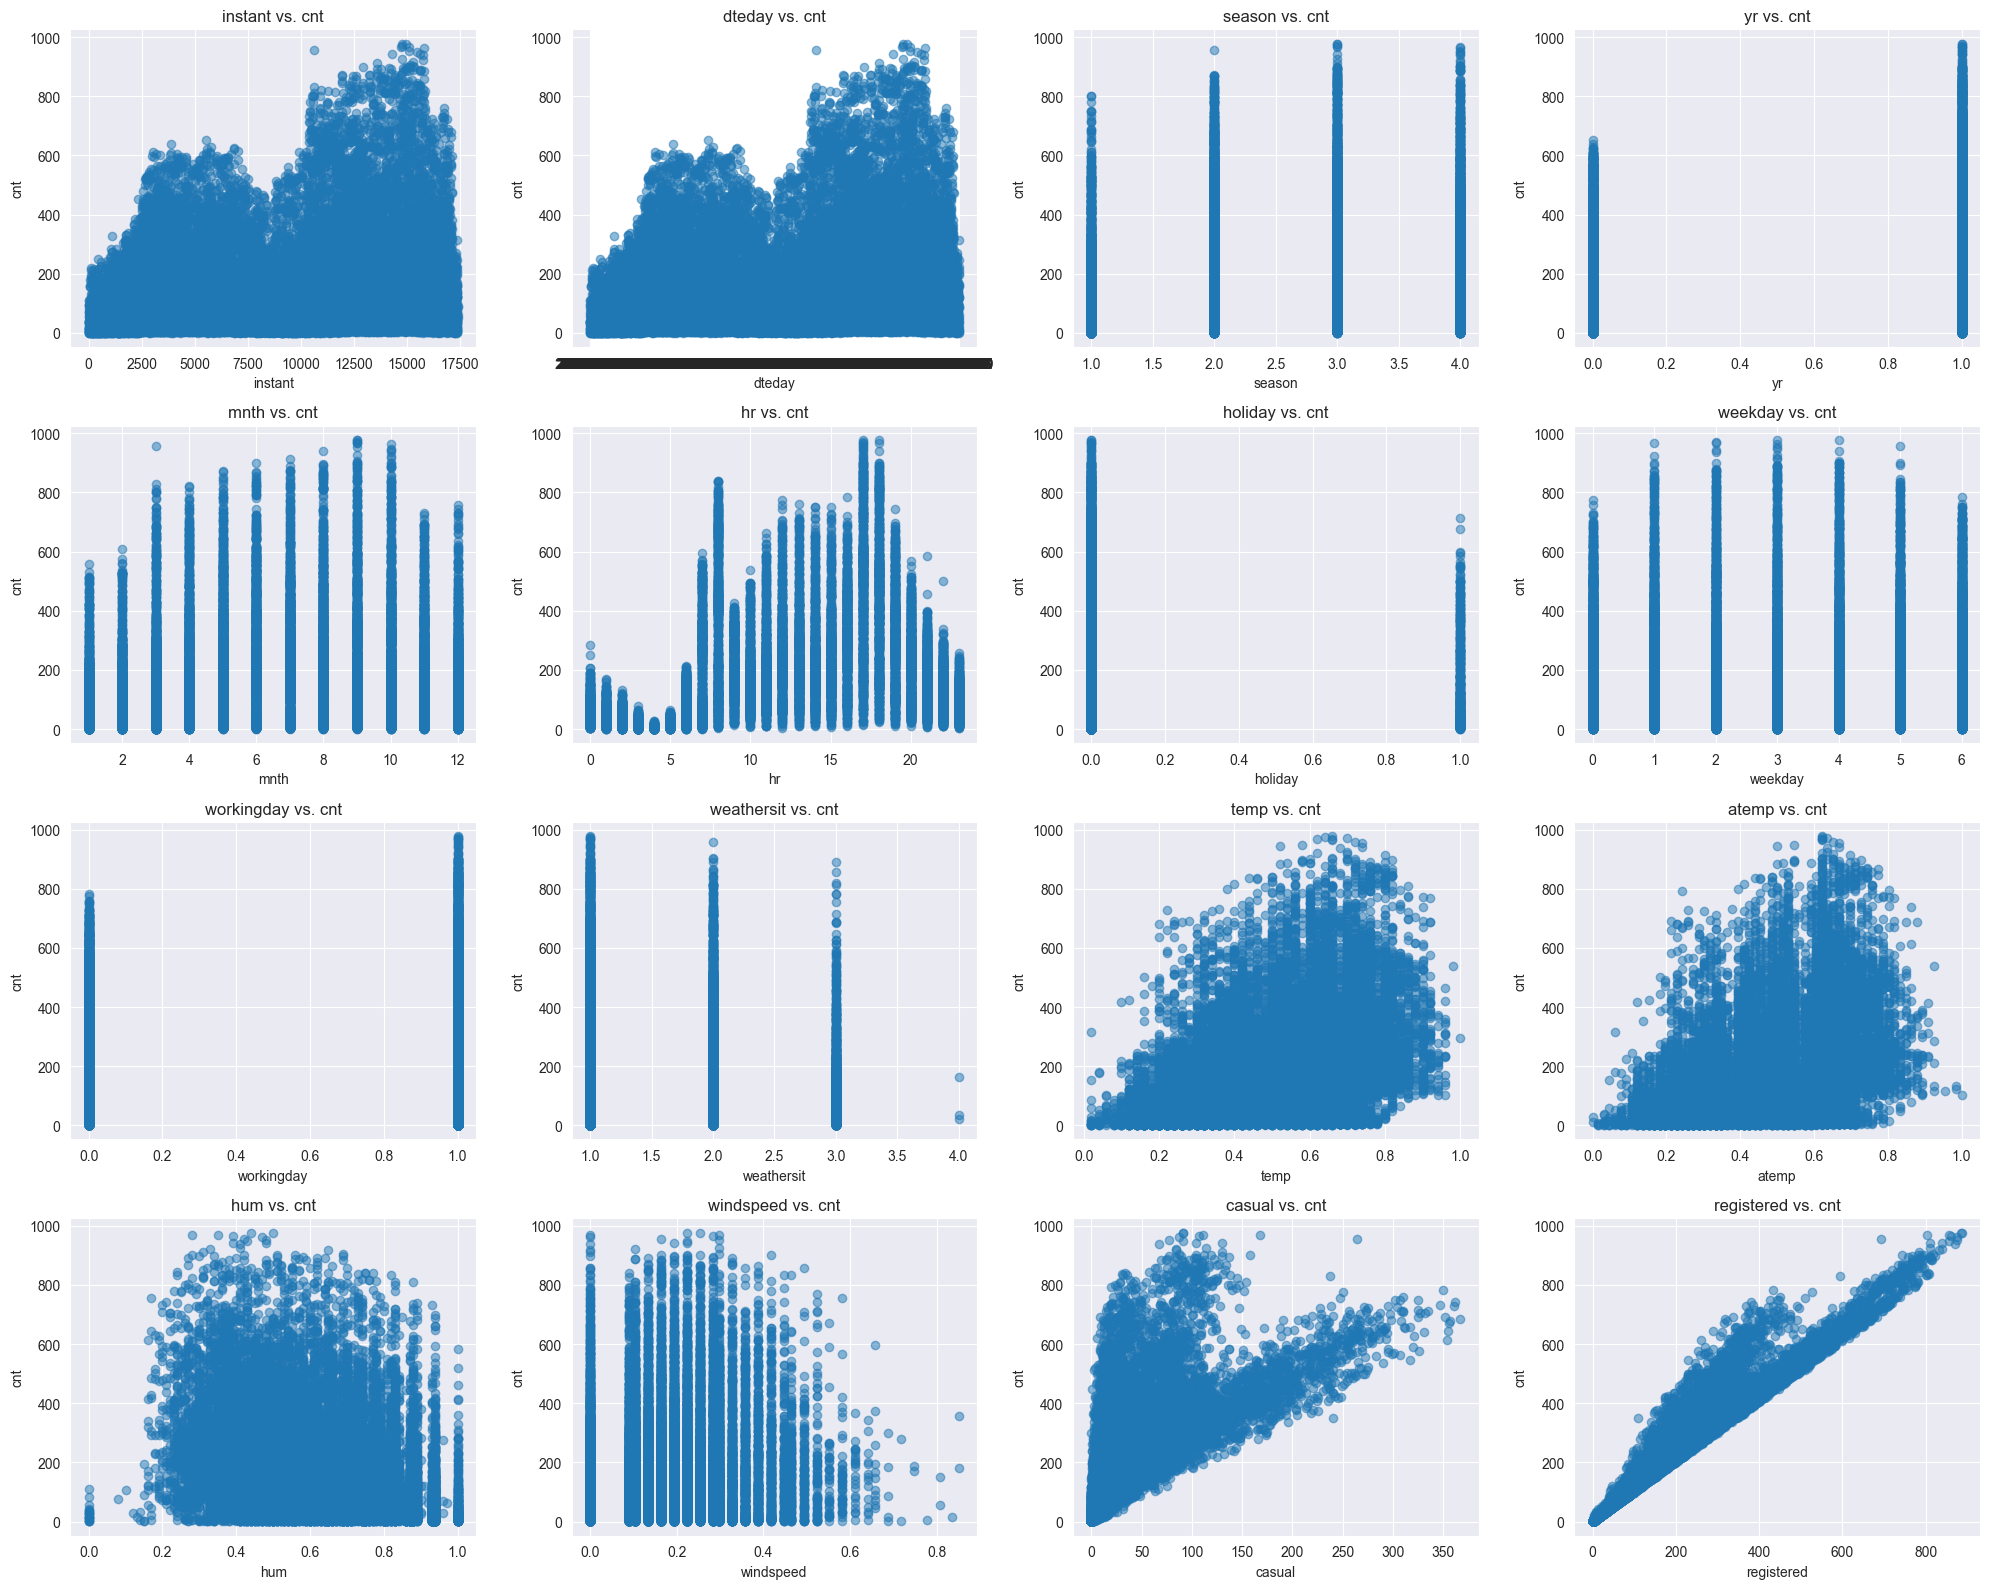

In [109]:
# Features excluding the target variable 'cnt'
features = df.columns.drop('cnt')

# Create a grid of subplots
n_features = len(features)
n_cols = 4  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))  # Adjust figsize as necessary
axs = axs.flatten()  # Flatten the 2D array of axes to easily iterate over

# Plot each feature against the target 'cnt'
for i, feature in enumerate(features):
    axs[i].scatter(df[feature], df['cnt'], alpha=0.5)  # Scatter plot
    axs[i].set_title(f'{feature} vs. cnt')  # Title for each subplot
    axs[i].set_xlabel(feature)  # X-axis label
    axs[i].set_ylabel('cnt')  # Y-axis label

# Turn off axes for any unused subplots
for j in range(i + 1, n_rows * n_cols):
    axs[j].axis('off')

# Adjust layout for readability
plt.tight_layout()

plt.savefig('feature_target.png')
plt.show()


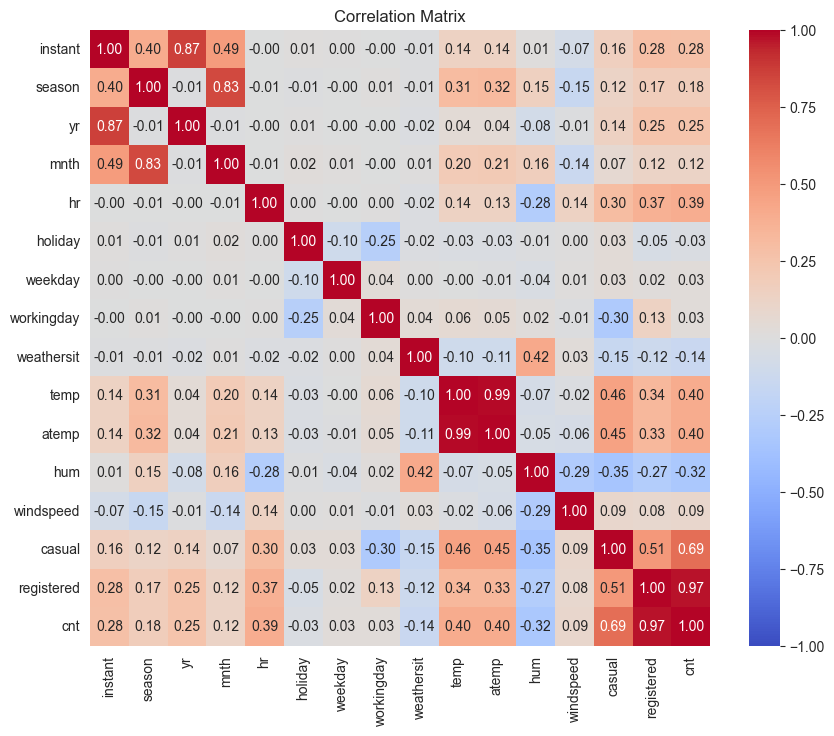

('Most correlated: registered',
 'Most negatively correlated: hum',
 'Least correlated: weekday')

In [94]:
# Calculate the correlation matrix
non_text_df = df.select_dtypes(exclude='object')
corr_matrix = non_text_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.pdf')
plt.show()

# Identify the most positively, most negatively, and least correlated features with 'cnt'
cnt_corr = corr_matrix['cnt'].sort_values(ascending=False)
most_pos_corr = cnt_corr.index[1]  # Highest positive correlation, excluding cnt
most_neg_corr = cnt_corr.index[-1]  # Highest negative correlation
least_corr = cnt_corr.index[cnt_corr.abs().argmin()]  # Least correlation (smallest absolute value)

f'Most correlated: {most_pos_corr}', f'Most negatively correlated: {most_neg_corr}', f'Least correlated: {least_corr}'

In [95]:
clean_df = df.drop(columns=['instant', 'atemp', 'registered', 'casual', 'dteday'])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.6 MB


In [96]:
clean_df = sklearn.utils.shuffle(clean_df, random_state=0)
train, test = clean_df[:10000], clean_df[10000:]
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7379 entries, 2435 to 2732
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      7379 non-null   int64  
 1   yr          7379 non-null   int64  
 2   mnth        7379 non-null   int64  
 3   hr          7379 non-null   int64  
 4   holiday     7379 non-null   int64  
 5   weekday     7379 non-null   int64  
 6   workingday  7379 non-null   int64  
 7   weathersit  7379 non-null   int64  
 8   temp        7379 non-null   float64
 9   hum         7379 non-null   float64
 10  windspeed   7379 non-null   float64
 11  cnt         7379 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 749.4 KB


In [97]:
def fit_least_sq():
    w = np.linalg.lstsq(train.drop(columns='cnt').astype(float), train['cnt'], rcond=None)[0]
    train_pred = train.drop(columns='cnt') @ w
    test_pred = test.drop(columns='cnt') @ w
    train_r2 = metrics.r2_score(train['cnt'], train_pred)
    test_r2 = metrics.r2_score(test['cnt'], test_pred)
    print(f'Train R^2: {train_r2}, Test R^2: {test_r2}')
    return w
least_sq_weights = fit_least_sq()

Train R^2: 0.3950750606990643, Test R^2: 0.3766194837192154


In [98]:
categorical_columns = ['season', 'mnth', 'hr', 'weekday', 'weathersit']
df_cat = pd.get_dummies(clean_df, columns=categorical_columns, drop_first=False)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 3439 to 2732
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            17379 non-null  int64  
 1   holiday       17379 non-null  int64  
 2   workingday    17379 non-null  int64  
 3   temp          17379 non-null  float64
 4   hum           17379 non-null  float64
 5   windspeed     17379 non-null  float64
 6   cnt           17379 non-null  int64  
 7   season_1      17379 non-null  bool   
 8   season_2      17379 non-null  bool   
 9   season_3      17379 non-null  bool   
 10  season_4      17379 non-null  bool   
 11  mnth_1        17379 non-null  bool   
 12  mnth_2        17379 non-null  bool   
 13  mnth_3        17379 non-null  bool   
 14  mnth_4        17379 non-null  bool   
 15  mnth_5        17379 non-null  bool   
 16  mnth_6        17379 non-null  bool   
 17  mnth_7        17379 non-null  bool   
 18  mnth_8        17379 non-null 

In [99]:
train, test = df_cat[:10000], df_cat[10000:]

In [100]:
least_sq_weights = fit_least_sq()

Train R^2: 0.6878784089142225, Test R^2: 0.6817966649545363


In [101]:
def locally_weighted_regression(x_query, X, y, tau):
    weights = np.exp(-np.sum((X - x_query) ** 2, axis=1) / (2 * tau ** 2))
    weights /= np.sum(weights)
    
    A = np.diag(weights)

    # w = (X^T A X)^(-1) X^T A y
    XTAX = X.T @ A @ X
    XTAy = X.T @ A @ y
    w = np.linalg.lstsq(XTAX, XTAy)[0]

    y_pred = x_query @ w
    return y_pred

def predict_lwr(X_train, y_train, X_queries, tau):
    y_preds = np.zeros(X_queries.shape[0])
    
    for i, x_query in enumerate(X_queries):
        y_preds[i] = locally_weighted_regression(x_query, X_train, y_train, tau)
    
    return y_preds

def evaluate(tau):
    train_pred = predict_lwr(X, y, X[:200], tau)
    test_pred = predict_lwr(X, y, X_test[:200], tau)
    train_r2 = metrics.r2_score(y[:200], train_pred)
    test_r2 = metrics.r2_score(y_test[:200], test_pred)
    print(f'Train R^2: {train_r2}, Test R^2: {test_r2}')
    return train_r2, test_r2
evaluate(1)

Train R^2: 0.826544607142196, Test R^2: 0.8400597127148084


(0.826544607142196, 0.8400597127148084)

In [102]:
evaluate(0.1)

Train R^2: 0.9999948061010259, Test R^2: -0.2439995631963605


(0.9999948061010259, -0.2439995631963605)

In [103]:
evaluate(10)


Train R^2: 0.639867144687081, Test R^2: 0.6895690481810941


(0.639867144687081, 0.6895690481810941)

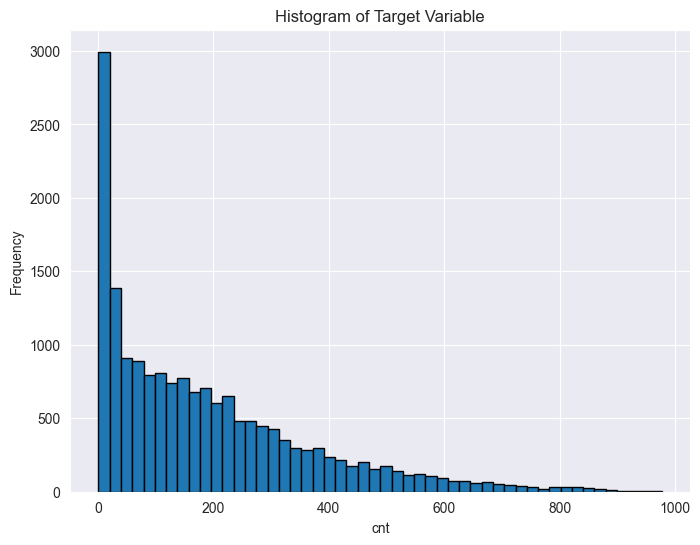

In [104]:
plt.figure(figsize=(8, 6))
plt.hist(clean_df['cnt'], bins=50, edgecolor='black')
plt.title('Histogram of Target Variable')
plt.xlabel('cnt')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('histogram.pdf')
plt.show()

It looks like a Poisson distribution with small lambda (<2)

In [105]:
from autograd import grad
import autograd.numpy as anp

def poisson_loss(w, X, y):
    linear_prediction = anp.dot(X, w)
    log_likelihood = anp.sum(y * linear_prediction - anp.exp(linear_prediction))
    return -log_likelihood

poisson_loss_grad = grad(poisson_loss)

def gradient_descent(X, y):
    
    # hyperparameters
    LEARNING_RATE = 1e-7
    ALPHA = 0.5
    MAX_ITER = 10000
    w = np.zeros(X.shape[1])
    delta = np.zeros(X.shape[1])
        
    for i in range(MAX_ITER):
        delta_old = np.copy(delta)
        # loss = poisson_loss(w, X, y)
        # print(loss)
        
        g = poisson_loss_grad(w, X, y)  # compute standard gradient
        # print(g)
        delta = LEARNING_RATE*g + ALPHA*delta_old  # update momentum term
        w -= delta  # update params
        if i % 100 == 0:
            loss = poisson_loss(w, X, y)
            print(f'Iteration {i}, Loss: {loss}')

    return w

poisson_w = gradient_descent(X, y)
train_pred = np.exp(X @ poisson_w)
test_pred = np.exp(X_test @ poisson_w)
train_r2 = metrics.r2_score(y, train_pred)
test_r2 = metrics.r2_score(y_test, test_pred)
print(f'Train R^2: {train_r2}, Test R^2: {test_r2}')
train_d2 = metrics.d2_tweedie_score(y, train_pred, power=1)
test_d2 = metrics.d2_tweedie_score(y_test, test_pred, power=1)
print(f'Train D^2: {train_d2}, Test D^2: {test_d2}')

Iteration 0, Loss: -942051.1485368502
Iteration 100, Loss: -8613887.288613558
Iteration 200, Loss: -8662684.284877153
Iteration 300, Loss: -8678301.10462913
Iteration 400, Loss: -8685522.563463332
Iteration 500, Loss: -8689457.268879717
Iteration 600, Loss: -8691820.5710756
Iteration 700, Loss: -8693342.268314816
Iteration 800, Loss: -8694375.78021924
Iteration 900, Loss: -8695107.357345812
Iteration 1000, Loss: -8695641.937005997
Iteration 1100, Loss: -8696042.203914097
Iteration 1200, Loss: -8696347.604515279
Iteration 1300, Loss: -8696584.111252086
Iteration 1400, Loss: -8696769.48720315
Iteration 1500, Loss: -8696916.2623442
Iteration 1600, Loss: -8697033.495805962
Iteration 1700, Loss: -8697127.866275268
Iteration 1800, Loss: -8697204.374399137
Iteration 1900, Loss: -8697266.81152252
Iteration 2000, Loss: -8697318.081985762
Iteration 2100, Loss: -8697360.430255825
Iteration 2200, Loss: -8697395.604215788
Iteration 2300, Loss: -8697424.974458039
Iteration 2400, Loss: -8697449.62257

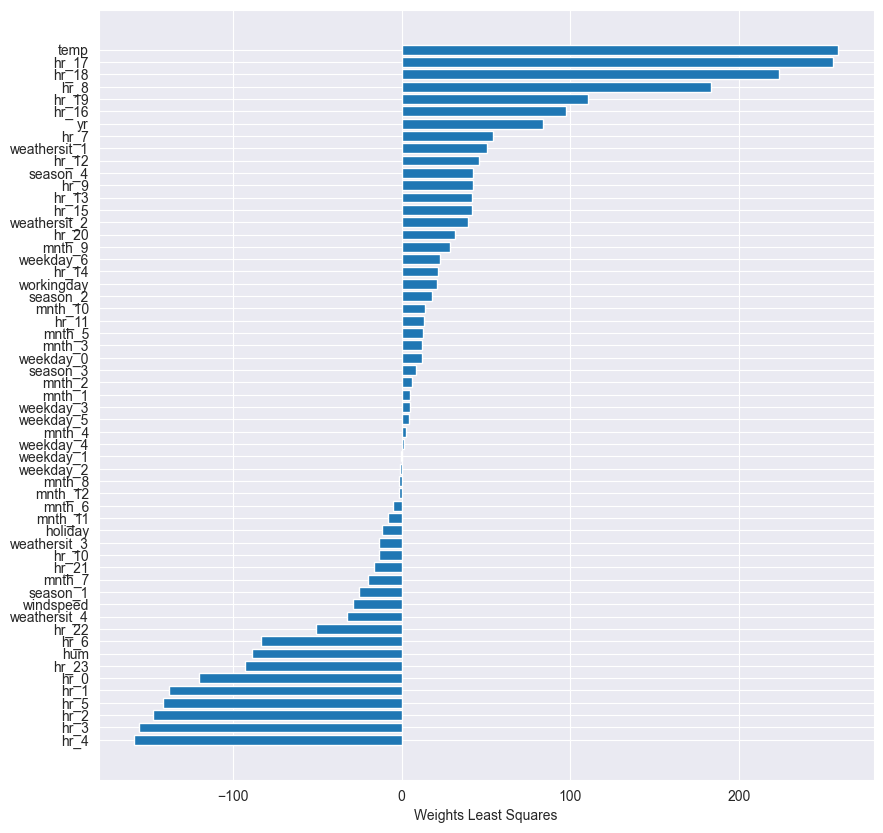

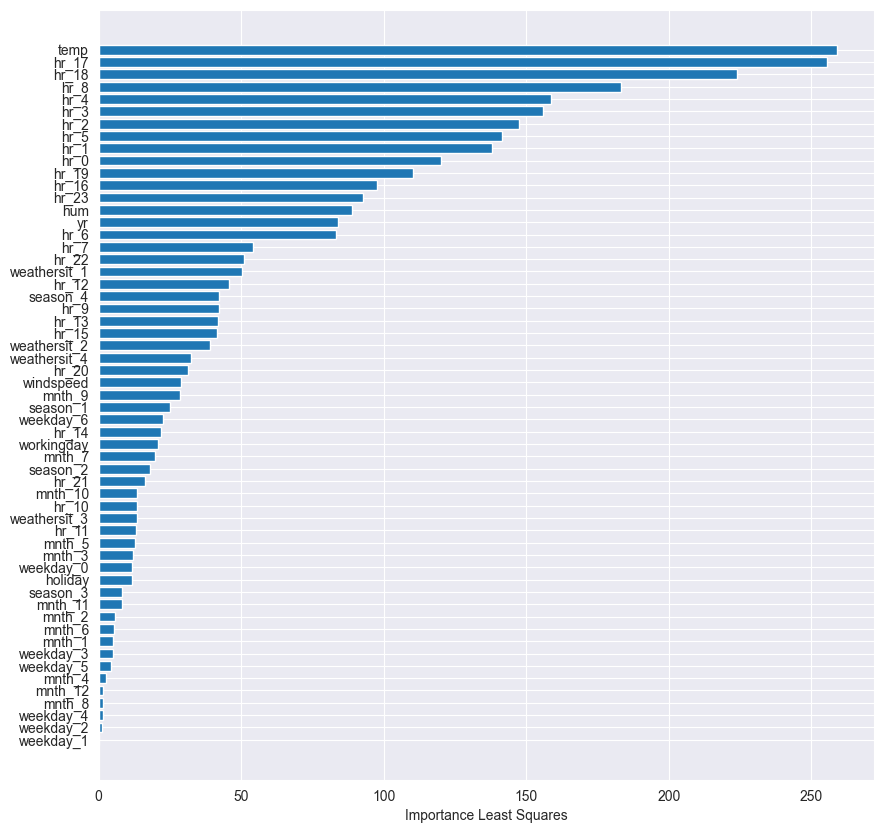

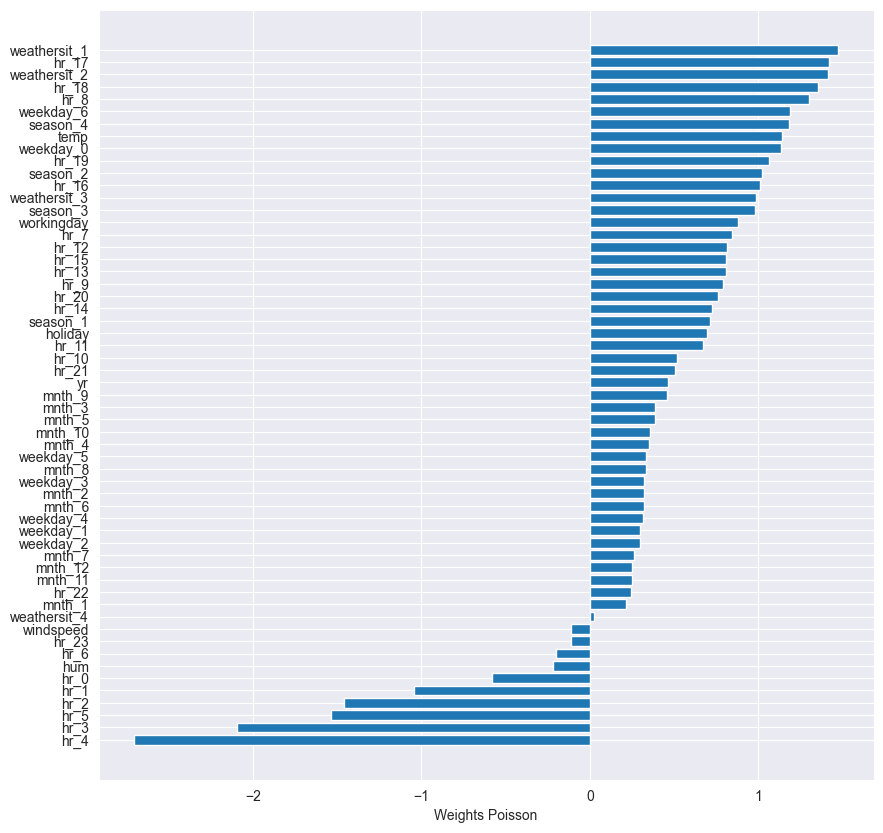

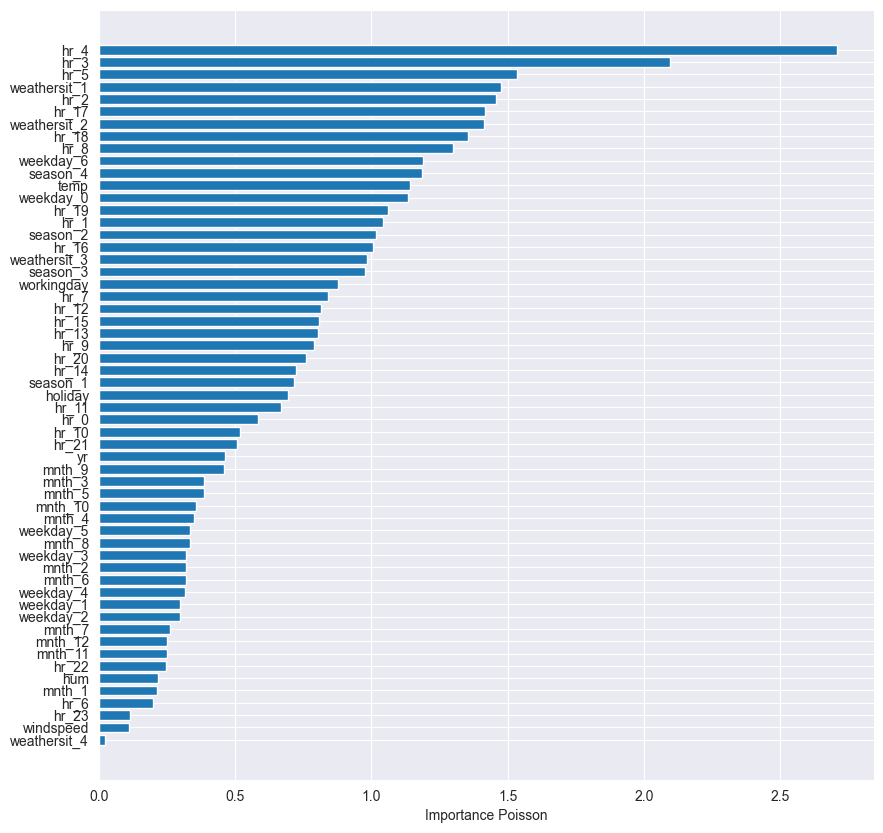

In [106]:
features = df_cat.columns.drop('cnt')
# Calculate the absolute values of the weights to determine feature importance
importance_ls = np.abs(least_sq_weights)
importance_poisson = np.abs(poisson_w)

importance_df = pd.DataFrame({'Feature': features, 'Importance LS': importance_ls, 'Importance Poisson': importance_poisson, 'Weights LS': least_sq_weights, 'Weights Poisson': poisson_w})
importance_df = importance_df.sort_values(by='Importance LS', ascending=False)

def plot(column, label):
    sorted_df = importance_df.sort_values(by=column, ascending=False)
    plt.figure(figsize=(10, 10))
    plt.barh(sorted_df['Feature'], sorted_df[column])
    plt.xlabel(label)
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
    plt.savefig(f"{column.replace(' ', '-')}.pdf")
    plt.show()
    
plot('Weights LS', 'Weights Least Squares')
plot('Importance LS', 'Importance Least Squares')
plot('Weights Poisson', 'Weights Poisson')
plot('Importance Poisson', 'Importance Poisson')

In [107]:
least_sq_weights

array([ 8.39501586e+01, -1.16641720e+01,  2.09814621e+01,  2.58880304e+02,
       -8.87692163e+01, -2.88272077e+01, -2.49919772e+01,  1.80565263e+01,
        8.23565131e+00,  4.23216714e+01,  5.03675412e+00,  5.90684083e+00,
        1.19579842e+01,  2.50691900e+00,  1.28361103e+01, -5.26941388e+00,
       -1.99321038e+01, -1.58787653e+00,  2.84155365e+01,  1.36128074e+01,
       -8.20128760e+00, -1.66039868e+00, -1.19928441e+02, -1.38118844e+02,
       -1.47506300e+02, -1.55728370e+02, -1.58745072e+02, -1.41491578e+02,
       -8.33322766e+01,  5.40076153e+01,  1.83084358e+02,  4.20575903e+01,
       -1.35401672e+01,  1.30467380e+01,  4.57610591e+01,  4.19340777e+01,
        2.17356347e+01,  4.16502550e+01,  9.76538044e+01,  2.55646982e+02,
        2.23861509e+02,  1.10240374e+02,  3.14270691e+01, -1.63145780e+01,
       -5.08768002e+01, -9.29027676e+01,  1.17970112e+01, -1.63925807e-01,
       -1.02778990e+00,  4.90068480e+00,  1.38857308e+00,  4.21974793e+00,
        2.25075705e+01,  

In [108]:
poisson_w

array([ 0.46504546,  0.69550002,  0.87768454,  1.14057865, -0.21628605,
       -0.11197496,  0.71526658,  1.01878152,  0.97836475,  1.18410571,
        0.2142051 ,  0.32163951,  0.38634897,  0.35109836,  0.3851001 ,
        0.31996923,  0.26359368,  0.33506193,  0.45807593,  0.3577386 ,
        0.25180849,  0.25187867, -0.58377758, -1.04306193, -1.45815316,
       -2.09425757, -2.70655371, -1.53531565, -0.20001762,  0.84209166,
        1.30117191,  0.79125194,  0.51789584,  0.66847297,  0.81569945,
        0.80496626,  0.72343792,  0.80919412,  1.00673387,  1.41872598,
        1.35613996,  1.06053374,  0.76168879,  0.5079293 ,  0.24627195,
       -0.1145499 ,  1.13529533,  0.29997181,  0.29831871,  0.32190199,
        0.31764691,  0.33534515,  1.18803867,  1.47474941,  1.41281249,
        0.98465773,  0.02429893])